# Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca dan Melihat Data

In [2]:
df = pd.read_csv('../Dataset/fish_data.csv')

In [3]:
# Cek informasi dataset
print("Informasi Dataset:")
print(df.info())
print("\nJumlah sampel per spesies:")
print(df['species'].value_counts())
print("\nStatistik deskriptif:")
print(df.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB
None

Jumlah sampel per spesies:
species
Setipinna taty            480
Anabas testudineus        476
Pethia conchonius         475
Otolithoides biauritus    468
Polynemus paradiseus      458
Sillaginopsis panijus     455
Otolithoides pama         435
Puntius lateristriga      418
Coilia dussumieri         415
Name: count, dtype: int64

Statistik deskriptif:
            length       weight    w_l_ratio
count  4080.000000  4080.000000  4080.000000
mean     17.353544     3.739875     0.252782
std       7.114684     1.040365     0.123046
min       6.360000     2.050000     0.080

# Persiapan Data

In [4]:
# Pisahkan fitur dan target
X = df[['length', 'weight', 'w_l_ratio']]
y = df['species']

In [5]:
# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [6]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Membuat dan Melatih Model

In [7]:
# Mencari jumlah tree optimal
n_estimators_values = [10, 50, 100, 200, 500]
best_accuracy = 0
best_n = 0

for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    accuracy = rf.score(X_test, y_test)
    print(f"Akurasi dengan {n} trees: {accuracy:.4f}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n = n
        rf_model = rf

print(f"\nJumlah tree optimal: {best_n} dengan akurasi: {best_accuracy:.4f}")

Akurasi dengan 10 trees: 0.9277
Akurasi dengan 50 trees: 0.9350
Akurasi dengan 100 trees: 0.9363
Akurasi dengan 200 trees: 0.9326
Akurasi dengan 500 trees: 0.9326

Jumlah tree optimal: 100 dengan akurasi: 0.9363


In [8]:
# Buat model Random Forest dengan jumlah tree optimal
rf_model = RandomForestClassifier(n_estimators=best_n, random_state=42)

# Latih model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Evaluasi Model

In [9]:
# Prediksi
y_pred = rf_model.predict(X_test)

# Hitung dan tampilkan akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy:.2%}")



Akurasi Model: 93.63%


In [10]:
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Laporan Klasifikasi:
                        precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00       120
     Coilia dussumieri       1.00      1.00      1.00        77
Otolithoides biauritus       0.71      0.74      0.72        91
     Otolithoides pama       1.00      1.00      1.00        86
     Pethia conchonius       1.00      1.00      1.00        89
  Polynemus paradiseus       1.00      1.00      1.00       102
  Puntius lateristriga       1.00      1.00      1.00        65
        Setipinna taty       0.75      0.72      0.73       100
 Sillaginopsis panijus       1.00      1.00      1.00        86

              accuracy                           0.94       816
             macro avg       0.94      0.94      0.94       816
          weighted avg       0.94      0.94      0.94       816



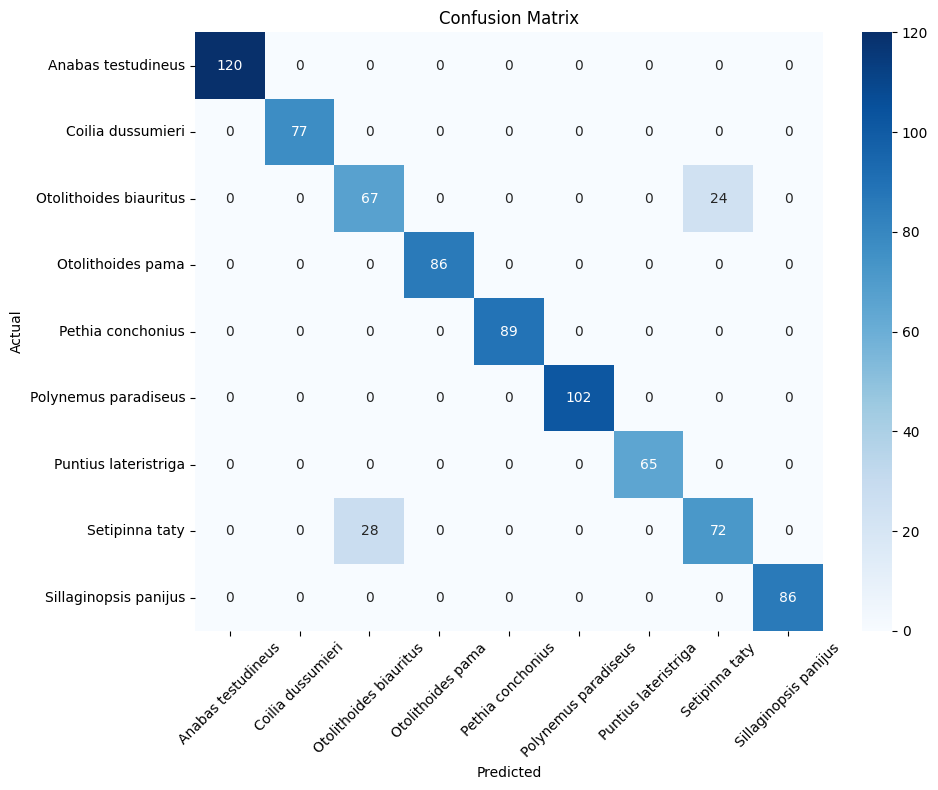

In [11]:
# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Contoh Prediksi

In [12]:
print("Contoh prediksi:")
for i in range(10):
    actual = le.inverse_transform([y_test[i]])[0]
    predicted = le.inverse_transform([y_pred[i]])[0]
    print(f"Data ke-{i+1}:")
    print(f"Aktual: {actual}")
    print(f"Prediksi: {predicted}")
    print("---")

Contoh prediksi:
Data ke-1:
Aktual: Anabas testudineus
Prediksi: Anabas testudineus
---
Data ke-2:
Aktual: Setipinna taty
Prediksi: Otolithoides biauritus
---
Data ke-3:
Aktual: Otolithoides pama
Prediksi: Otolithoides pama
---
Data ke-4:
Aktual: Polynemus paradiseus
Prediksi: Polynemus paradiseus
---
Data ke-5:
Aktual: Anabas testudineus
Prediksi: Anabas testudineus
---
Data ke-6:
Aktual: Otolithoides pama
Prediksi: Otolithoides pama
---
Data ke-7:
Aktual: Otolithoides biauritus
Prediksi: Setipinna taty
---
Data ke-8:
Aktual: Sillaginopsis panijus
Prediksi: Sillaginopsis panijus
---
Data ke-9:
Aktual: Sillaginopsis panijus
Prediksi: Sillaginopsis panijus
---
Data ke-10:
Aktual: Otolithoides pama
Prediksi: Otolithoides pama
---


In [13]:
# Mencoba model dengan data baru
print("\nMencoba model dengan beberapa sampel data:")

# Contoh data ikan baru
sample_data = pd.DataFrame({
    'length': [15.5, 25.3, 8.7],
    'weight': [3.2, 4.5, 2.8],
    'w_l_ratio': [0.21, 0.18, 0.32]
})

# Prediksi menggunakan model
predictions = rf_model.predict(sample_data)

print("\nHasil Prediksi:")
print("Data ke-1:")
print(f"Panjang: {sample_data['length'][0]} cm")
print(f"Berat: {sample_data['weight'][0]} kg")
print(f"Rasio: {sample_data['w_l_ratio'][0]}")
print(f"Prediksi Spesies: {le.inverse_transform([predictions[0]])[0]}")

print("\nData ke-2:")
print(f"Panjang: {sample_data['length'][1]} cm")
print(f"Berat: {sample_data['weight'][1]} kg")
print(f"Rasio: {sample_data['w_l_ratio'][1]}")
print(f"Prediksi Spesies: {le.inverse_transform([predictions[1]])[0]}")

print("\nData ke-3:")
print(f"Panjang: {sample_data['length'][2]} cm")
print(f"Berat: {sample_data['weight'][2]} kg")
print(f"Rasio: {sample_data['w_l_ratio'][2]}")
print(f"Prediksi Spesies: {le.inverse_transform([predictions[2]])[0]}")


Mencoba model dengan beberapa sampel data:

Hasil Prediksi:
Data ke-1:
Panjang: 15.5 cm
Berat: 3.2 kg
Rasio: 0.21
Prediksi Spesies: Otolithoides biauritus

Data ke-2:
Panjang: 25.3 cm
Berat: 4.5 kg
Rasio: 0.18
Prediksi Spesies: Otolithoides pama

Data ke-3:
Panjang: 8.7 cm
Berat: 2.8 kg
Rasio: 0.32
Prediksi Spesies: Anabas testudineus


In [14]:
# Export model menggunakan pickle
import pickle

# Menyimpan model Random Forest
with open('model_rf_ikan.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Menyimpan Label Encoder
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(le, file)

print("\nModel dan Label Encoder telah berhasil disimpan!")
print("- Model tersimpan sebagai: model_rf_ikan.pkl")
print("- Label Encoder tersimpan sebagai: label_encoder.pkl")



Model dan Label Encoder telah berhasil disimpan!
- Model tersimpan sebagai: model_rf_ikan.pkl
- Label Encoder tersimpan sebagai: label_encoder.pkl
